In [121]:
import numpy as np
import distortionPrototype as DPT   # Add your python class(es)
from utils import *
import librosa as lr
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy

In [122]:
distortion = DPT.Distortion()
distortion.gain  = 8         # dB
distortion.tone  = 0.5       # Hz
distortion.level = 0.5       # dB
distortion.alpha = 12


# Plotting Static Curve

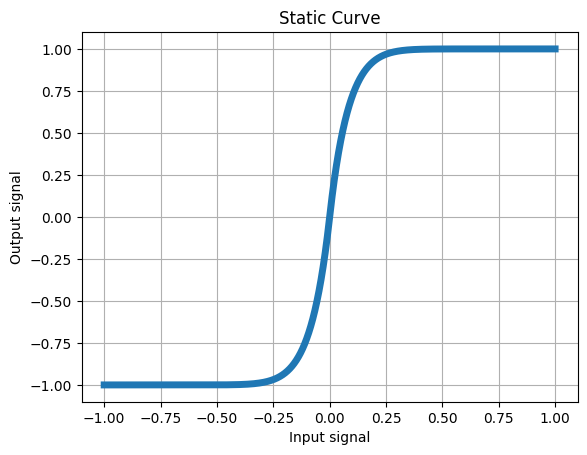

In [123]:
distortion.plotStaticCurveLinear()

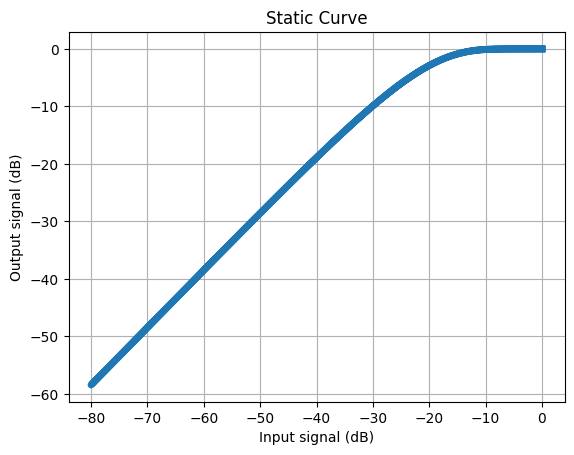

In [124]:
distortion.plotStaticCurveDecibel()

# Loading Audio Files

In [125]:
pathToAudio = "guitar_riff.wav" # set path to an audio file

sampleRate  = 44100         
cleanInput, sampleRate = lr.load(pathToAudio, sr = sampleRate, mono = True, duration = 10)
cleanInput /= np.max(np.abs(cleanInput))
ipd.Audio(data = cleanInput, rate = sampleRate)

In [126]:
#clehanInput = distortion.getAmplitudeEnvelope(cleanInput, sampleRate)
ipd.Audio(data = cleanInput, rate = sampleRate)

# Applying Distortion

In [127]:
clippedOutput = distortion.applyDistortion(cleanInput)
clippedOutput /= np.max(np.abs(clippedOutput))
ipd.Audio(data = clippedOutput, rate = sampleRate)

In [128]:
scipy.io.wavfile.write('output.wav',sampleRate, clippedOutput)

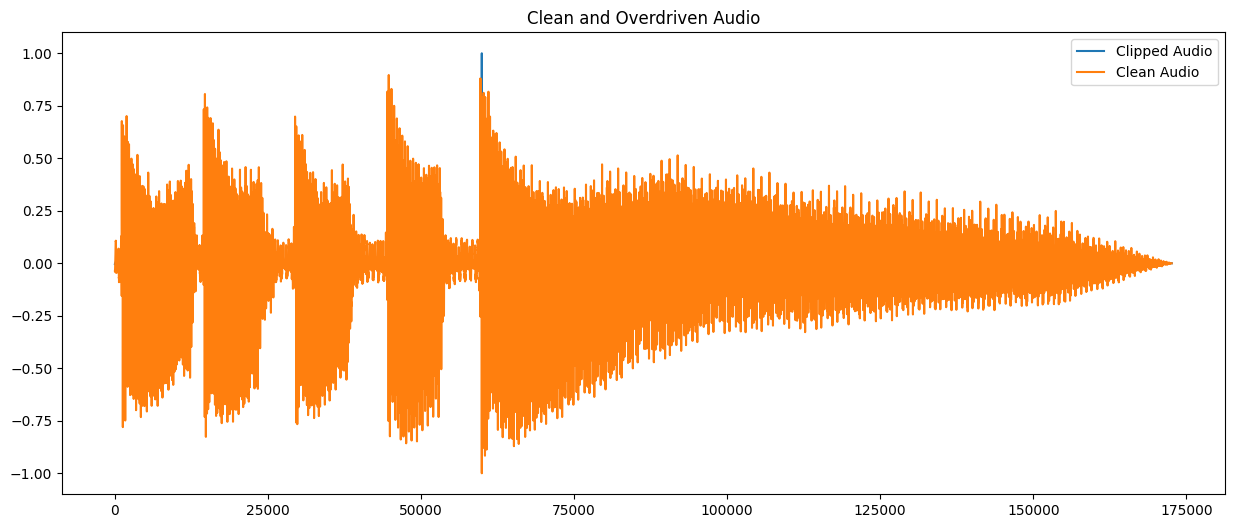

In [129]:
plt.figure(figsize = (15, 6))
plt.title("Clean and Overdriven Audio")
plt.plot(clippedOutput, label = "Clipped Audio")
plt.plot(cleanInput, label = "Clean Audio")
plt.legend(loc = "upper right");

# Testing with Sinusoid

In [130]:
distortion.gain  = 6

In [131]:
tt  = np.arange(0, 1, 1/sampleRate)
f   = 1000 

cleanSine = np.sin(2 * np.pi * f * tt)
clippedSine = distortion.applyHardClipping(cleanSine)

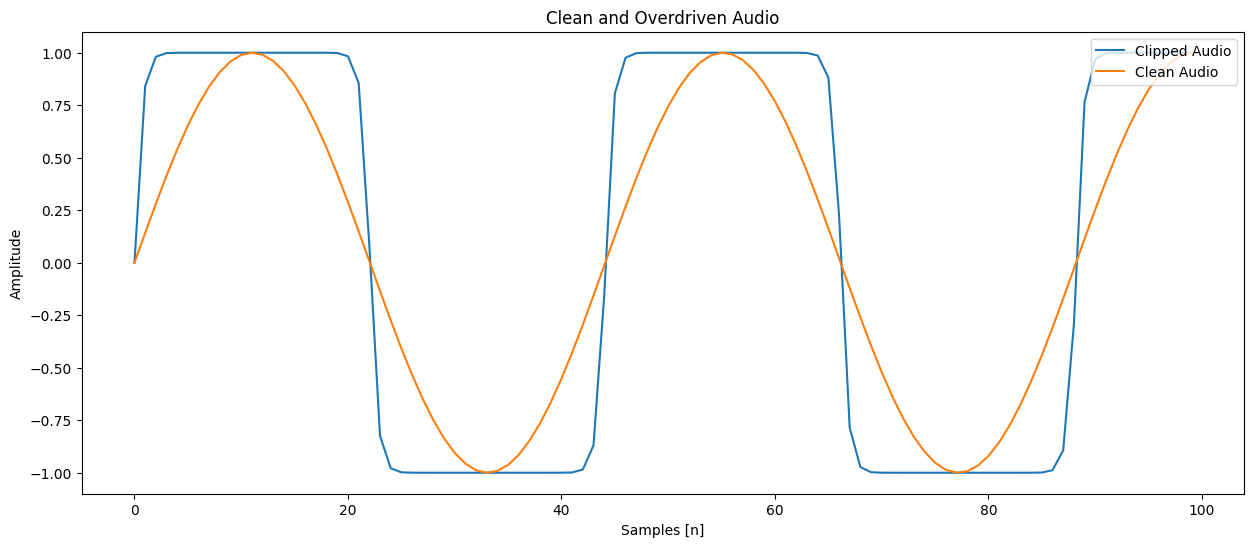

In [132]:
plt.figure(figsize = (15, 6))
plt.title("Clean and Overdriven Audio")
plt.plot(clippedSine[:100], label = "Clipped Audio")
plt.plot(cleanSine[:100], label = "Clean Audio")
plt.xlabel("Samples [n]")
plt.ylabel("Amplitude")
plt.legend(loc = "upper right");

# Spectrogram of Clean Sine

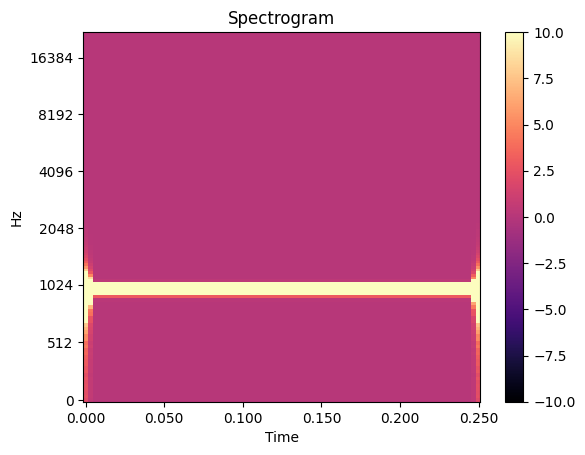

In [133]:
plotSpectrogram(inputSignal = cleanSine, sampleRate = int(sampleRate))

# Spectrogram of Clipped Sine

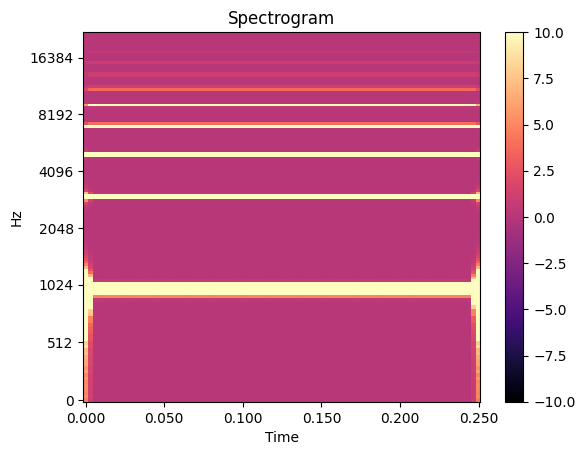

In [134]:
plotSpectrogram(inputSignal = clippedSine, sampleRate = int(sampleRate))